# Model2

## Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors (SARIMAX)

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

ModuleNotFoundError: No module named 'pandas'

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jh4578/5293finalproject/main/GOOG_update.csv',date_parser = True)

In [3]:
data.index = data['Date']
data.drop(columns = ['Date','High','Low','Close','Adj Close'], inplace = True)

Here is the graph of the stock of google, I am going to use data before 2019 as the training data, the rest as the test data.

In [8]:
data_train = data[:'2019']
data_test = data['2019':]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(
    data_train['Open'],
    exog=data_train.drop('Open', axis=1),
    order=(1, 1, 0),       # (p, d, q) for ARIMA
    seasonal_order=(0, 0, 0, 0), # (P, D, Q, s) for Seasonal component (no seasonality)
    enforce_stationarity=False,
    enforce_invertibility=False
)

In [ ]:
results = model.fit()

In [16]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  172
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -322.787
Date:                Sat, 29 Apr 2023   AIC                            665.574
Time:                        16:44:47   BIC                            696.932
Sample:                    09-01-2004   HQIC                           678.298
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Volume             9.906e-11   1.56e-10      0.635      0.526   -2.07e-10    4.05e-10
CPI                  -2.1516   1.11e-06  -1.94e+06      0.000      -2.152      -2.152
Core CPI              0.

The coefficients for each of the features, along with their standard errors, z-scores, and p-values, help us understand the impact of each feature on the target variable. For example, 'CPI', 'Core CPI', 'Unemployment_rate', and 'DFF' all have highly significant p-values (close to 0), suggesting that they have strong relationships with the target variable. On the other hand, features like 'Volume', 'gdp', 'm1', and 'M2' have less significant p-values, indicating weaker relationships. The Ljung-Box test statistic (Q) has a high p-value (0.96), which suggests that there is no significant autocorrelation in the residuals, and the Jarque-Bera test shows that the residuals are not normally distributed. The model exhibits heteroskedasticity with a probability of 0.00, which may indicate the presence of volatility in the data.

In the SARIMAX model, the most significant variables influencing the 'Open' stock price are 'CPI', 'Core CPI', 'Unemployment_rate', and 'DFF', with strong negative and positive relationships, respectively. On the other hand, 'Volume', 'gdp', 'm1', and 'M2' demonstrate weak and insignificant relationships with the stock price, indicating that they may not be useful predictors in this model.

In [37]:
predictions = results.get_prediction(
    start=pd.to_datetime(data_test.index[0]), 
    end=pd.to_datetime(data_test.index[-1]), 
    exog=data_test.drop('Open', axis=1)
)
predicted_mean = predictions.predicted_mean


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(data_test['Open'], predicted_mean)
rmse = np.sqrt(mse)
print('MSE',mse)
print("RMSE:", rmse)


MSE 408.7711120633586
RMSE: 20.21808873418451


In [41]:
data_test.index = pd.to_datetime(data_test.index)

In [43]:
comparison = pd.DataFrame({'stock_price': data_test['Open'],'predictions':predicted_mean})

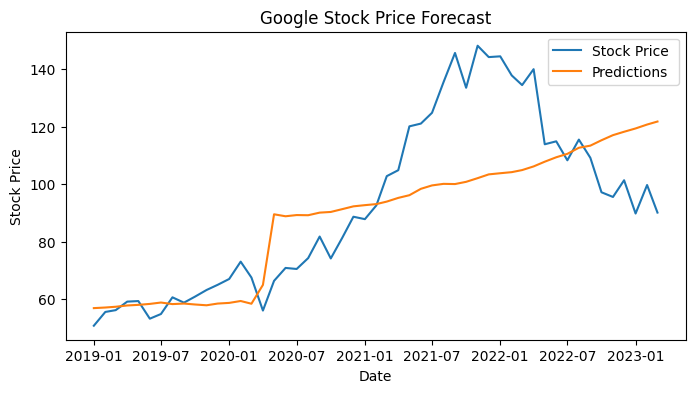

In [47]:
plt.figure(figsize=(8, 4))
plt.plot(comparison.stock_price, label = 'Stock Price ')
plt.plot(comparison.predictions, label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Forecast')
plt.legend()
plt.show()

## Conclusion

SARIMAX fits the data better than the Linear Regression model with MSE = 408. This because stock price in future is highly correlated with previous stock price, and SARIMAX captures this feature and combined other useful vairables to predict the data, while LR does not.